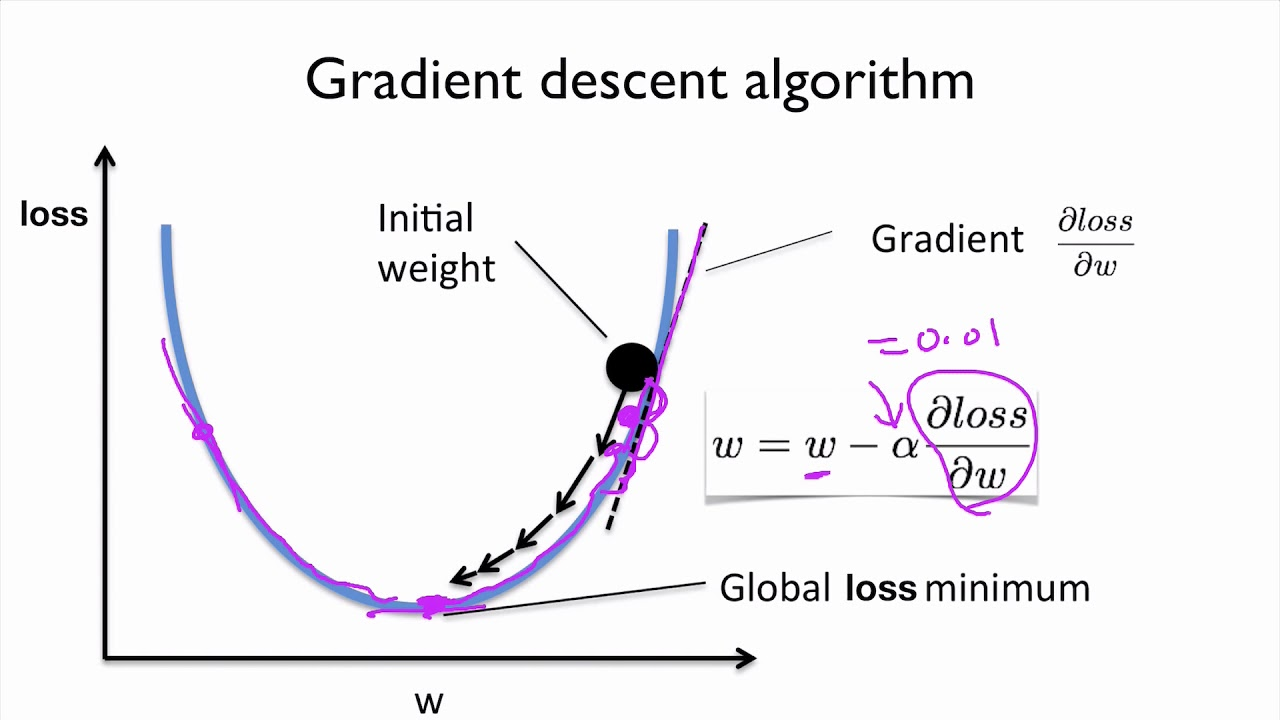

Gradient Descent is an algorithm where our aim is to reach the global minima or minimize the loss and with each iteration we update our weights(w) to reach the minima

Predictions(or y_hat) is the predicted values of target values based on the weights and it is given by 
y_hat=w0+w1x1+w2x2+.....+ wnxn= w.Tx ; 
where w0 is the intercept and w1.....wn are the coeffients

gradent or change in weights from the previous weights is given by dot product of the difference between the true target values (y_train) and the predicted values (y_hat)

del_w= (1/N)* (-yi+ (y_hat))xi

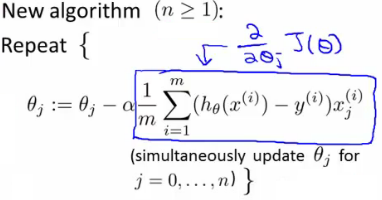

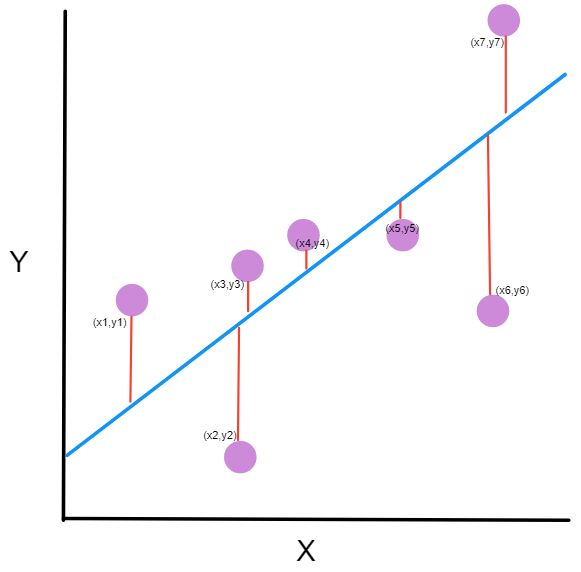
So we want to minimize the distance between the points and the line and with each updated weights the errors are reduced

Our cost function is given by the formula

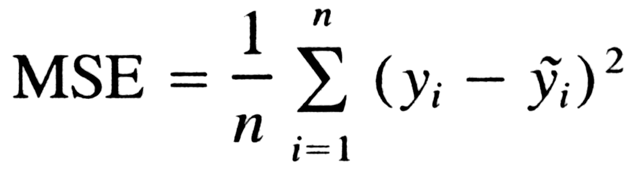

# Implementation on boston dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
boston = load_boston()

In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target.shape)

(506,)


In [5]:
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [6]:
bos['Price']=load_boston().target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Preprocessing

## Checking for null values

In [7]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

No null values are present in our dataset

## Plot the distribution plot for the target variable Price

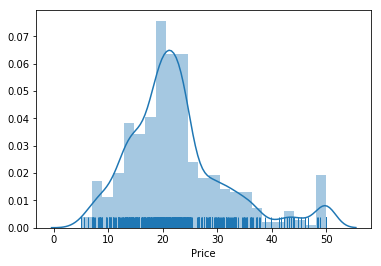

In [8]:
import seaborn as sns
sns.distplot(bos['Price'], kde=True, rug=True);

## Finding the correlation between the variables and plotting it using heatmap

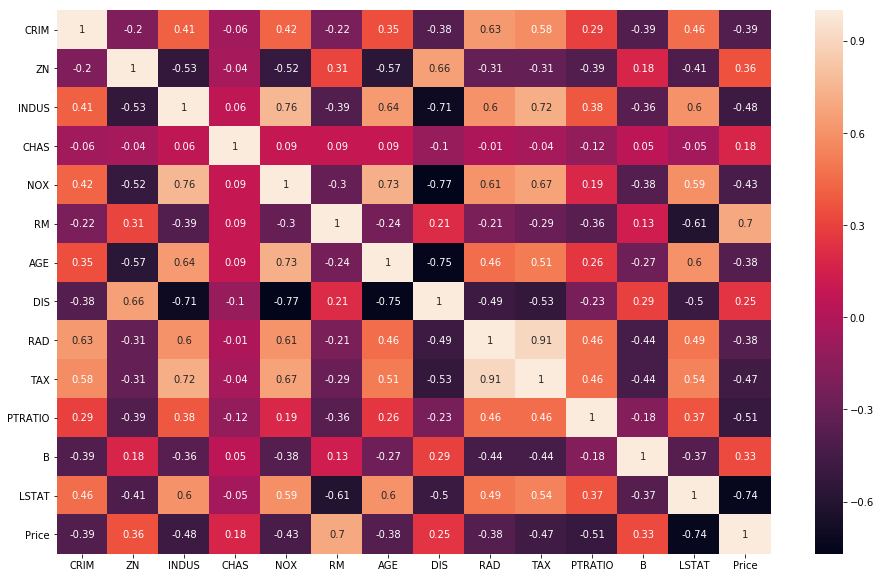

In [9]:
#pandas corr function-> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
correlation = bos.corr().round(2)
#round()-> Python provides an inbuilt function round() which rounds off to the given number of digits and 
#          returns the floating point number, if no number of digits is provided for round off , 
#          it rounds off the number to the nearest integer.
# annot = True to print the values inside the square
plt.figure(figsize = (16,10))
sns.heatmap(data=correlation, annot=True)

The correlation coefficient ranges from -1 to 1. 
If the value is close to 1, it means that there is a strong positive correlation between the two variables.(eg TAX,RAD)
When it is close to -1, the variables have a strong negative correlation.(NOX,DIS)

## Observations:

To fit a linear regression model:

1. we select those features which have a high correlation with our target variable Price. By looking at the correlation matrix we can see that RM has a strong positive correlation with Price (0.7) where as LSTAT has a high negative correlation with Price(-0.74).
    
    
2. An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

# Splitting the data into training and testing sets

In [10]:
X = bos.drop('Price', axis = 1)
Y = bos['Price']

In [11]:
X=np.array(X)
Y=np.array(Y)

In [12]:
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506,)


In [13]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [14]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(x_train)

x_train_std=std.transform(x_train)
print(x_train_std.shape) #type=ndarray
print(x_train_std[0,:])
x_test_std=std.transform(x_test)
print(x_test_std.shape)#type=ndarray
print(x_test_std[0,:])

(339, 13)
[ 0.9118389  -0.50241886  1.07230484 -0.25697808  1.63354788  0.48603435
  0.96277384 -0.82347725  1.65533351  1.55210038  0.80807825 -2.84295938
  1.52320257]
(167, 13)
[-0.37292315 -0.50241886 -0.71156079 -0.25697808 -0.42181359  2.50937899
  0.67570743 -0.28495622 -0.18226963 -0.58268447 -0.48954969  0.31897381
 -1.33112633]


In [15]:
coef=np.zeros(x_train_std.shape[1]).reshape(1,13)
b=0
N=float(y_train.shape[0])
for iterations in range(100):
    del_coef=np.zeros(x_train_std.shape[1]).reshape(1,13)
    del_b=0
    for i in range(y_train.shape[0]):
        y_hat=np.dot(coef,x_train_std[i])+b
        #error=y_train[i]-predictions
        del_coef+=(x_train_std[i]*(y_train[i]-y_hat))
        del_coef=del_coef*(-2/N)
        del_b+=(y_train[i]-y_hat)
        del_b=del_b*(-2/N)
        coef=coef-0.1*(del_coef)
        b=b-0.1*(del_b)
    if(iterations==100):
        break
print(coef)
print(b)

[[-1.28659833  0.79458302 -0.41725586  0.22685702 -1.42099904  2.85218234
  -0.39211272 -2.75126487  2.20403268 -1.47045373 -2.11158671  1.02316383
  -3.30328626]]
[22.56121858]


In [16]:
from sklearn.metrics import mean_squared_error
y_pred_me=np.zeros(y_test.shape[0])
for i in range(y_test.shape[0]):
    y_pred_me[i]=np.dot(coef,x_test_std[i])+b
print(y_pred_me.shape)

(167,)


In [17]:
err_me=mean_squared_error(y_test, y_pred_me)
print(err_me)

28.63196087916305


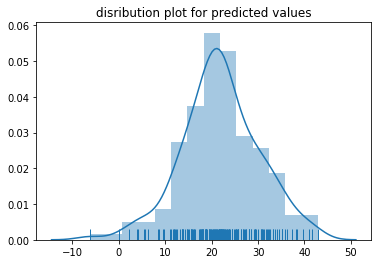

In [18]:
import seaborn as sns
sns.distplot(y_pred_me, kde=True, rug=True);
plt.title("disribution plot for predicted values")
plt.show()

## Using Scikit finding the coeffients and finding error

In [19]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
b=lm.intercept_
print(b)

22.537168141592957


In [21]:
coef=lm.coef_
print(coef)

[-1.31193031  0.86187745 -0.16719287  0.18957843 -1.48658584  2.79131565
 -0.32737703 -2.77204093  2.97567549 -2.2727549  -2.13375869  1.05842993
 -3.33495407]


In [22]:
y_pred=lm.predict(x_test_std)

In [23]:
from sklearn.metrics import mean_squared_error
err=mean_squared_error(y_test, y_pred)
print(err)

28.53045876597462


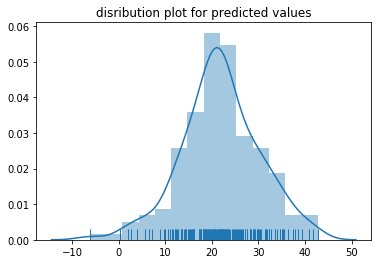

In [24]:
import seaborn as sns
sns.distplot(y_pred, kde=True, rug=True);
plt.title("disribution plot for predicted values")
plt.show()

# References

1. scikit-learn--> documentation
2. python machine learning by example by-> Yuxi Lui
3. EDA->https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155